## How to measure your risk-adjusted returns with the Sortino ratio

In today’s issue, I’m going to show you how to use a popular performance metric to measure risk: the Sortino ratio.

The Sortino ratio tells you the risk-adjusted return of an investment. It is similar to the Sharpe ratio except it only considers “downside deviation”. In other words, it only uses the asset’s standard deviation of negative returns. Investors consider it a better measure of an asset’s risk-adjusted performance since positive volatility is a benefit.

If you’re investing or trading, you might want to consider the Sortino ratio as one of your performance metrics.

## Without considering the Sortino ratio, you miss important information about the performance.

Like the Sharpe ratio, you can use the Sortino ratio to compare investments.

For example:

- Stock A returns 30% with 20% volatility and 30% downside deviation
- Stock B returns 20% with 13% volatility and 15% downside deviation
Which is the better investment?

Both stocks have the same Sharpe ratios. Stock B’s return is lower but so is the downside deviation. That means stock A has more volatility in its negative returns and is riskier than stock B. The Sortino ratio captures this dynamic.

By the end of this newsletter, you’ll know how to:

Get stock price data
Compute the Sortino ratio
Compute downside deviation
Compare two investment options
All using Python.

Let’s go!

In [1]:
# Get the data
import yfinance as yf
import numpy as np

data = yf.download(["SPY", "AAPL"], start="2020-01-01", end="2022-07-31")
# This gives you a MultiIndex DataFrame. There’s one extra line of code we need to build the returns.

closes = data['Adj Close']
spy_returns = closes.SPY.pct_change().dropna()
aapl_returns = closes.AAPL.pct_change().dropna()

[*********************100%***********************]  2 of 2 completed


In [3]:
# Compute the Sortino ratio

# A function for the Sortino ratio in Python is straightforward.

def sortino_ratio(returns, adjustment_factor=0.0):
    """
    Determines the Sortino ratio of a strategy.

    Parameters
    ----------
    returns : pd.Series or np.ndarray
        Daily returns of the strategy, noncumulative.
		adjustment_factor : int, float
        Constant daily benchmark return throughout the period.

    Returns
    -------
    sortino_ratio : float

    Note
    -----
    See `<https://www.sunrisecapital.com/wp-content/uploads/2014/06/Futures_
    Mag_Sortino_0213.pdf>`__ for more details.
    """

    # compute annualized return
    returns_risk_adj = np.asanyarray(returns - adjustment_factor)
    mean_annual_return = returns_risk_adj.mean() * 252

    # compute the downside deviation
    downside_diff = np.clip(returns_risk_adj, np.NINF, 0)
    np.square(downside_diff, out=downside_diff)
    annualized_downside_deviation = np.sqrt(downside_diff.mean()) * np.sqrt(252)

    return mean_annual_return / annualized_downside_deviation

The function takes a series of daily returns and subtracts an adjustment factor. Some investors use this to measure the return over the risk-free rate. Since the risk free-rate has been near 0 for almost a decade, I don’t consider it in the analysis. Finally, take the average return and annualize it.

To compute downside deviation, I use the clip function. The clip returns the numbers in an array between two values. I take the negative returns by using negative infinity and 0. Then I find the standard deviation of the negative returns and annualize it.

The Sortino ratio is the average annualized return divided by the annualized downside deviation.

A note on downside deviation

“Risk” usually refers to the volatility of an asset. That’s because the higher the volatility the higher the uncertainty of where the price will be when you want to sell the asset. When most people think of risk, they usually think of how much money they might lose. Downside deviation attempts to capture the “money-losing” part of the asset volatility.



<AxesSubplot:xlabel='Date'>

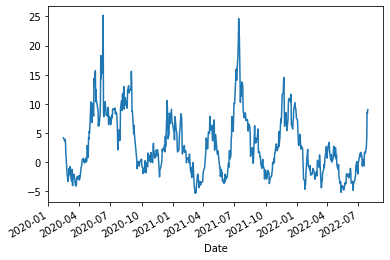

In [4]:
# Compare investment options

# Compute the Sortino ratio for AAPL and SPY.

# sortino ratio for SPY
sortino_ratio(spy_returns)

# sortino ratio for AAPL
sortino_ratio(aapl_returns)
# The Sortino ratio for AAPL is higher than for SPY. That means you got more return for every unit of downside risk.

# It’s always useful to look at performance metrics through time because they are never static. It’s easy with Python.

aapl_returns.rolling(30).apply(sortino_ratio).plot()

<AxesSubplot:>

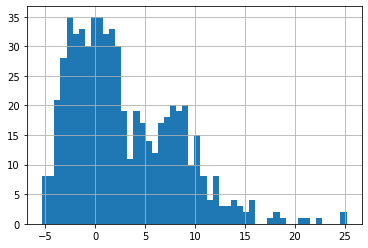

In [5]:
aapl_returns.rolling(30).apply(sortino_ratio).hist(bins=50)


<AxesSubplot:>

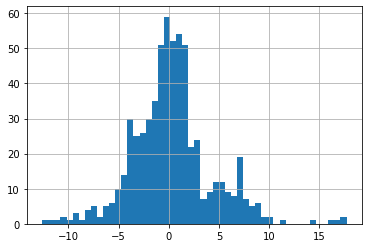

In [6]:
# Finally, let’s see how the Sortino ratios of AAPL and SPY compare through time. Was AAPL always a better risk adjusted return?

# Subtract the SPY Sortino ratio from the AAPL Sortino ratio and plot the result as a histogram.

(
    aapl_returns.rolling(30).apply(sortino_ratio)
    - spy_returns.rolling(30).apply(sortino_ratio)
).hist(bins=50)